<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_Complete_Classic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score





#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/Heart Risk Combined Final Dataset.csv'
heart_attack = pd.DataFrame(pd.read_csv(file_path))
heart_attack


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,M,140,289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,49,F,160,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,37,M,130,283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,48,F,138,214,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54,M,150,195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,57,0,140,241,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9980,45,1,110,264,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9981,68,1,144,193,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9982,57,1,130,131,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [182]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailan' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealan' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})



heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)


unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

heart_attack.head()


[1 0]
[nan -1.  1.]
[nan -1.  1.]
[nan  0. -1.  1.]
[nan  4.  3.  2.  0.  1.  5.]


,Age,Sex,Blood Pressure,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Risk
0,40,1,140,289,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,49,0,160,180,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,37,1,130,283,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,48,0,138,214,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,54,1,150,195,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [183]:
# One-hot encode the columns
heart_attack = pd.get_dummies(heart_attack, columns=['Cholesterol','Heart Rate','Diabetes','Family History','Smoking','Obesity','Alcohol Consumption',
                                           'Sedentary Hours Per Day','Income','BMI','Physical Activity Days Per Week','Sleep Hours Per Day','Continent','Hemisphere'], drop_first=True)
heart_attack

,Age,Sex,Blood Pressure,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Triglycerides,Country,...,Sleep Hours Per Day_7.0,Sleep Hours Per Day_8.0,Sleep Hours Per Day_9.0,Sleep Hours Per Day_10.0,Continent_1.0,Continent_2.0,Continent_3.0,Continent_4.0,Continent_5.0,Hemisphere_1.0
0,40,1,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,49,0,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,37,1,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,48,0,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,54,1,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,57,0,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9980,45,1,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9981,68,1,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9982,57,1,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


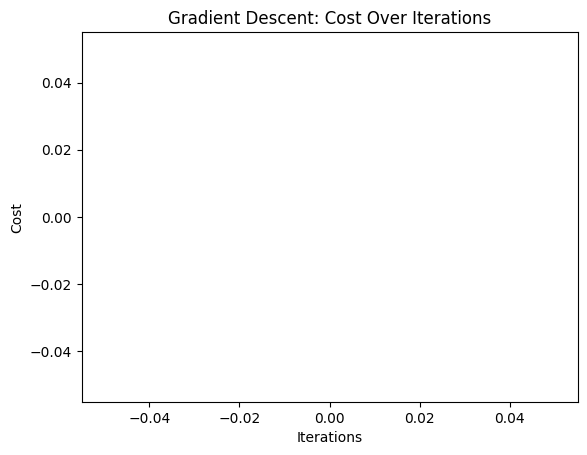

Optimal theta: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [184]:
imputer = SimpleImputer(strategy='mean')


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1 / m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
    return float(cost)  # Convert the cost to a scalar

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = X.T @ (h - y) / m
        theta -= alpha * gradient
        costs.append(cost_function(X, y, theta))

    return theta, costs

# Extract features and target
X = heart_attack[['Sex', 'Age', 'Blood Pressure','Country']].values
y = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Add intercept term to features
X = np.hstack((np.ones((len(y), 1)), X))

# Initialize parameters
theta = np.zeros((X.shape[1], 1))

# Set hyperparameters
alpha = 0.0001
iterations = 1200

# Run gradient descent
theta, costs = gradient_descent(X, y, theta, alpha, iterations)

# Plot the cost over iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost Over Iterations')
plt.show()

print('Optimal theta:', theta)

In [185]:
# Extract features and target for linear regression
X_linear = heart_attack[['Sex', 'Age', 'Blood Pressure', 'Country']].values
y_linear = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_linear = imputer.fit_transform(X_linear)

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_linear, y_linear)

# Get predictions
y_linear_pred = linear_model.predict(X_linear)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_linear, y_linear_pred)
r2_score = linear_model.score(X_linear, y_linear)

print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')

Linear Regression Metrics:
Mean Squared Error (MSE): 0.24
R-squared (R2): 0.00


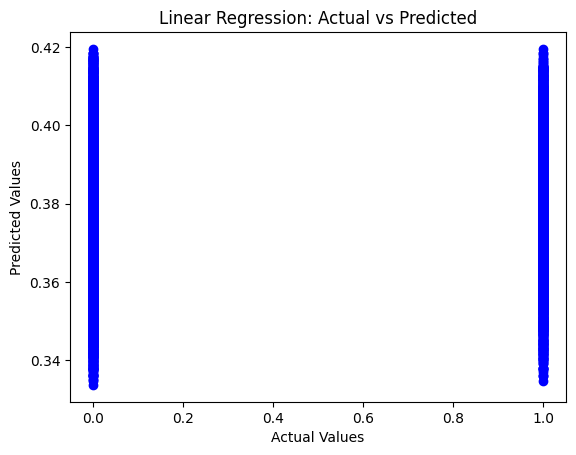

In [186]:
# Scatter plot for linear regression
plt.scatter(y_linear, y_linear_pred, color='blue')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [187]:
# Extract features and target for linear regression
X_linear = heart_attack[['Sex', 'Age', 'Blood Pressure', 'Country']].values
y_linear = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Check for missing values
missing_values = np.isnan(X_linear).sum()
print(f'Missing values in X_linear:\n{missing_values}')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_linear = imputer.fit_transform(X_linear)

# Check again for missing values after imputation
missing_values_after_imputation = np.isnan(X_linear).sum()
print(f'Missing values in X_linear after imputation:\n{missing_values_after_imputation}')

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_linear, y_linear)

# Get predictions
y_linear_pred = linear_model.predict(X_linear)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_linear, y_linear_pred)
r2_score = linear_model.score(X_linear, y_linear)

print('Linear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')

Missing values in X_linear:
2084
Missing values in X_linear after imputation:
0
Linear Regression Metrics:
Mean Squared Error (MSE): 0.24
R-squared (R2): 0.00


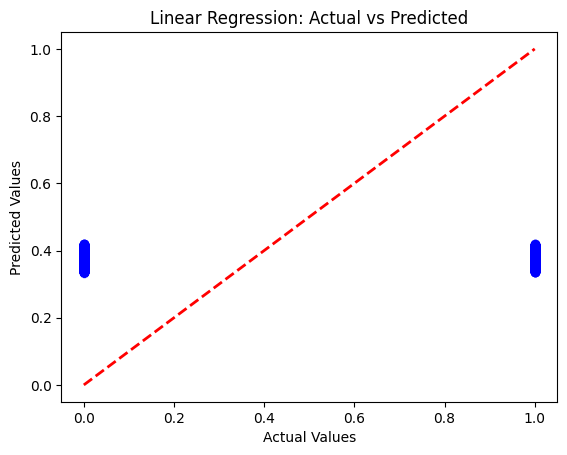

In [188]:
# Scatter plot for linear regression
plt.scatter(y_linear, y_linear_pred, color='blue', alpha=0.5)  # alpha controls point transparency
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot a diagonal line for perfect predictions
plt.plot([min(y_linear), max(y_linear)], [min(y_linear), max(y_linear)], linestyle='--', color='red', linewidth=2)

plt.show()

In [189]:
# Extract features and target for logistic regression
X_logistic = heart_attack[['Sex', 'Age', 'Blood Pressure', 'Country']].values
y_logistic = heart_attack['Heart Risk'].values

# Handle missing values for logistic regression
imputer = SimpleImputer(strategy='mean')
X_logistic = imputer.fit_transform(X_logistic)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=0)

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train, y_train)

# Predictions for logistic regression
y_logistic_pred = logistic_model.predict(X_test)

# Calculate metrics for logistic regression
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
logistic_precision = precision_score(y_test, y_logistic_pred)
logistic_recall = recall_score(y_test, y_logistic_pred)
logistic_f1 = f1_score(y_test, y_logistic_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {logistic_accuracy:.2f}')
print(f'Precision: {logistic_precision:.2f}')
print(f'Recall: {logistic_recall:.2f}')
print(f'F1 Score: {logistic_f1:.2f}')

# ... (Continue with linear regression code)

# Extract features and target for linear regression
X_linear = heart_attack[['Sex', 'Age', 'Blood Pressure', 'Country']].values
y_linear = heart_attack['Heart Risk'].values.reshape(-1, 1)

# Handle missing values for linear regression
imputer_linear = SimpleImputer(strategy='mean')
X_linear = imputer_linear.fit_transform(X_linear)

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_linear, y_linear)

# Get predictions
y_linear_pred = linear_model.predict(X_linear)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_linear, y_linear_pred)
r2_score = linear_model.score(X_linear, y_linear)

print('\nLinear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')


Logistic Regression Metrics:
Accuracy: 0.62
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Linear Regression Metrics:
Mean Squared Error (MSE): 0.24
R-squared (R2): 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


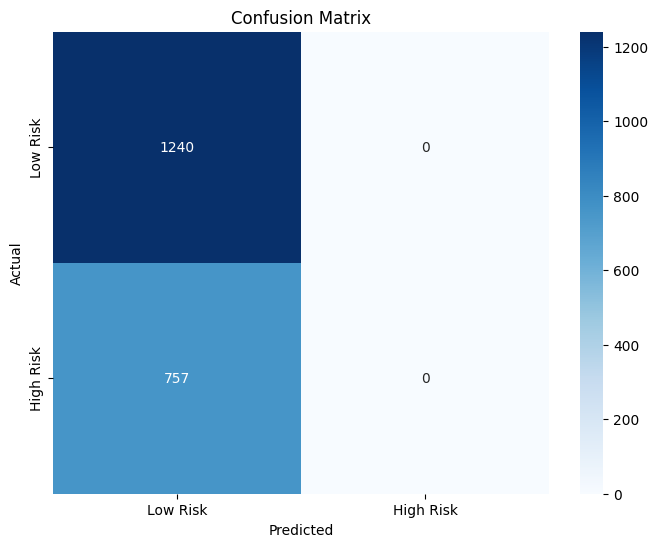

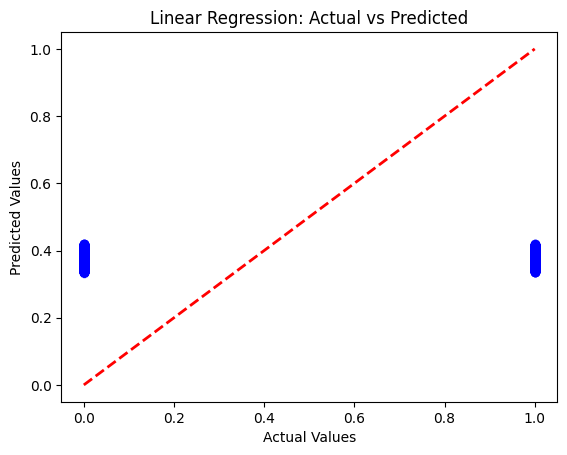

In [190]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for logistic regression
labels_logistic = ['Low Risk', 'High Risk']
plot_confusion_matrix(y_test, y_logistic_pred, labels_logistic)

# Scatter plot for linear regression
plt.scatter(y_linear, y_linear_pred, color='blue', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_linear), max(y_linear)], [min(y_linear), max(y_linear)], linestyle='--', color='red', linewidth=2)
plt.show()

In [191]:
# Initialize logistic regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X_train, y_train)

# Predictions for logistic regression
y_logistic_pred = logistic_model.predict(X_test)

# Calculate metrics for logistic regression
logistic_accuracy = accuracy_score(y_test, y_logistic_pred)
logistic_precision = precision_score(y_test, y_logistic_pred)
logistic_recall = recall_score(y_test, y_logistic_pred)
logistic_f1 = f1_score(y_test, y_logistic_pred)

# Confusion matrix for logistic regression
logistic_conf_matrix = confusion_matrix(y_test, y_logistic_pred)

print('\nLogistic Regression Metrics:')
print(f'Accuracy: {logistic_accuracy:.2f}')
print(f'Precision: {logistic_precision:.2f}')
print(f'Recall: {logistic_recall:.2f}')
print(f'F1 Score: {logistic_f1:.2f}')
print('\nConfusion Matrix for Logistic Regression:')
print(logistic_conf_matrix)

# ... (Continue with linear regression code)

# Initialize linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X_linear, y_linear)

# Get predictions
y_linear_pred = linear_model.predict(X_linear)

# Calculate metrics for linear regression
linear_mse = mean_squared_error(y_linear, y_linear_pred)
r2_score = linear_model.score(X_linear, y_linear)

# Confusion matrix for linear regression
linear_conf_matrix = confusion_matrix(y_linear, (y_linear_pred >= 0.5).astype(int))

print('\nLinear Regression Metrics:')
print(f'Mean Squared Error (MSE): {linear_mse:.2f}')
print(f'R-squared (R2): {r2_score:.2f}')
print('\nConfusion Matrix for Linear Regression:')
print(linear_conf_matrix)


Logistic Regression Metrics:
Accuracy: 0.62
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Confusion Matrix for Logistic Regression:
[[1240    0]
 [ 757    0]]

Linear Regression Metrics:
Mean Squared Error (MSE): 0.24
R-squared (R2): 0.00

Confusion Matrix for Linear Regression:
[[6172    0]
 [3812    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


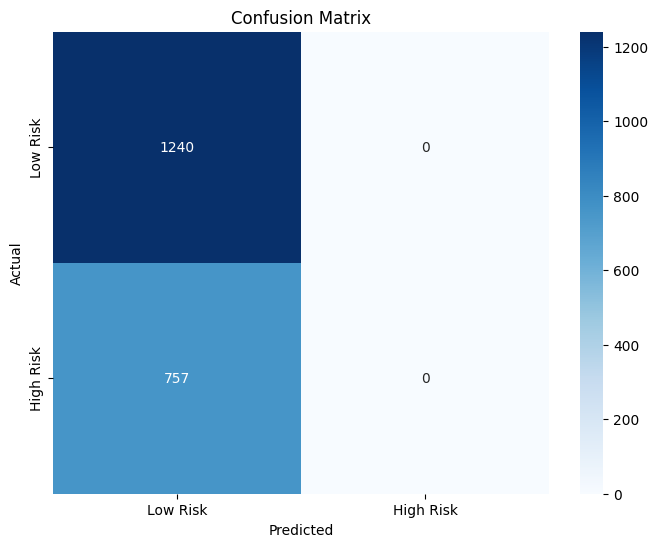

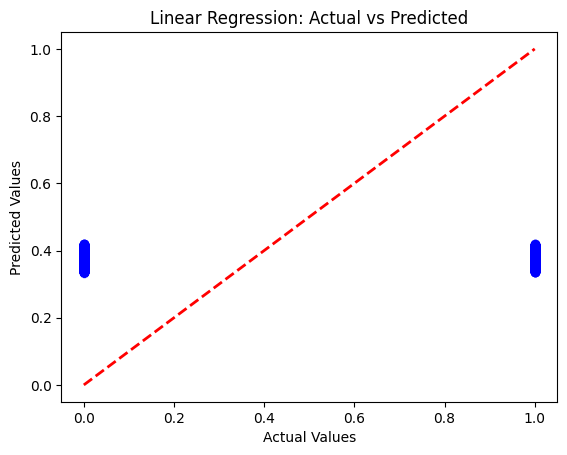

In [192]:
# Function to plot confusion matrix heatmap
def plot_confusion_matrix_heatmap(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix heatmap for logistic regression
labels_logistic = ['Low Risk', 'High Risk']
plot_confusion_matrix_heatmap(logistic_conf_matrix, labels_logistic)

# Scatter plot for linear regression
plt.scatter(y_linear, y_linear_pred, color='blue', alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_linear), max(y_linear)], [min(y_linear), max(y_linear)], linestyle='--', color='red', linewidth=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Gaussian Naive Bayes Metrics:
Accuracy: 0.62
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Confusion Matrix for Gaussian Naive Bayes:
[[1240    0]
 [ 757    0]]


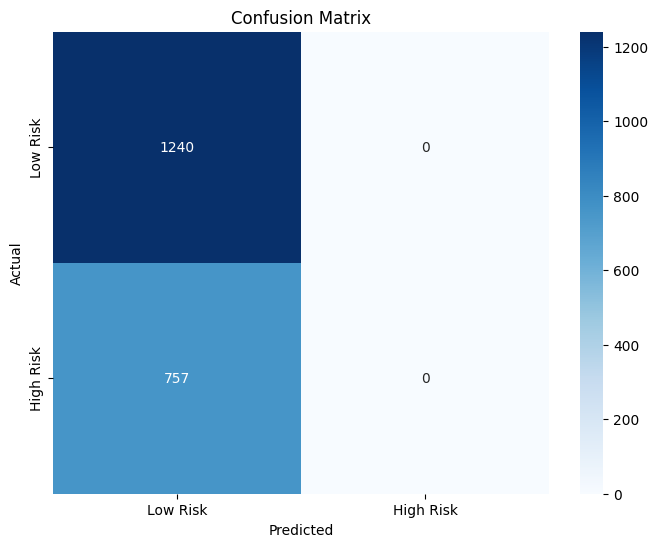

In [193]:
# Extract features and target for Gaussian Naive Bayes
X_nb = heart_attack[['Sex', 'Age', 'Blood Pressure', 'Country']].values
y_nb = heart_attack['Heart Risk'].values

# Handle missing values for Gaussian Naive Bayes
imputer_nb = SimpleImputer(strategy='mean')
X_nb = imputer_nb.fit_transform(X_nb)

# Split the data into training and testing sets for Gaussian Naive Bayes
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size=0.2, random_state=0)


# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_nb, y_train_nb)

# Predictions for Gaussian Naive Bayes
y_nb_pred = nb_model.predict(X_test_nb)

# Calculate metrics for Gaussian Naive Bayes
nb_accuracy = accuracy_score(y_test_nb, y_nb_pred)
nb_precision = precision_score(y_test_nb, y_nb_pred)
nb_recall = recall_score(y_test_nb, y_nb_pred)
nb_f1 = f1_score(y_test_nb, y_nb_pred)

# Confusion matrix for Gaussian Naive Bayes
nb_conf_matrix = confusion_matrix(y_test_nb, y_nb_pred)

print('\nGaussian Naive Bayes Metrics:')
print(f'Accuracy: {nb_accuracy:.2f}')
print(f'Precision: {nb_precision:.2f}')
print(f'Recall: {nb_recall:.2f}')
print(f'F1 Score: {nb_f1:.2f}')
print('\nConfusion Matrix for Gaussian Naive Bayes:')
print(nb_conf_matrix)

# Plot confusion matrix for Gaussian Naive Bayes
labels_nb = ['Low Risk', 'High Risk']
plot_confusion_matrix(y_test_nb, y_nb_pred, labels_nb)

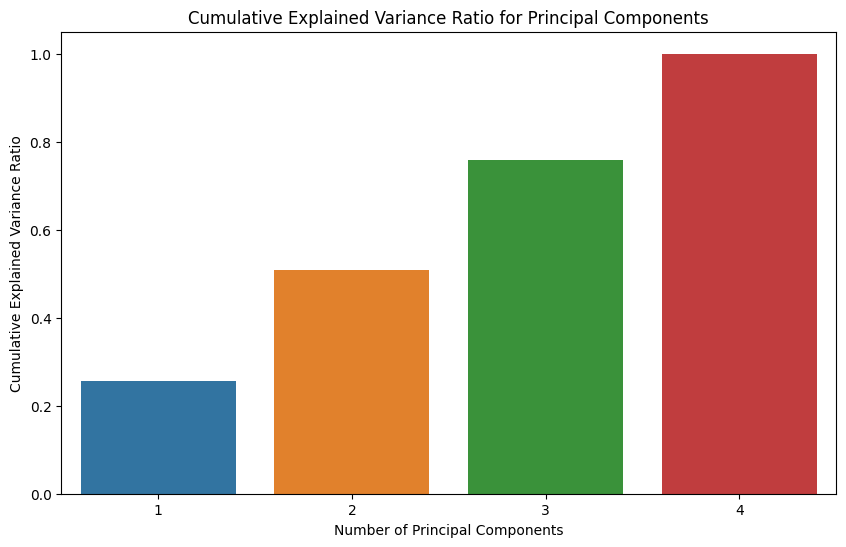

In [194]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
heart_attack_imputed = pd.DataFrame(imputer.fit_transform(heart_attack), columns=heart_attack.columns)

# Extract features and target
X = heart_attack_imputed[['Sex', 'Age', 'Blood Pressure', 'Country']]
y = heart_attack_imputed['Heart Risk']

# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, pca.n_components_ + 1), y=np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance Ratio for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

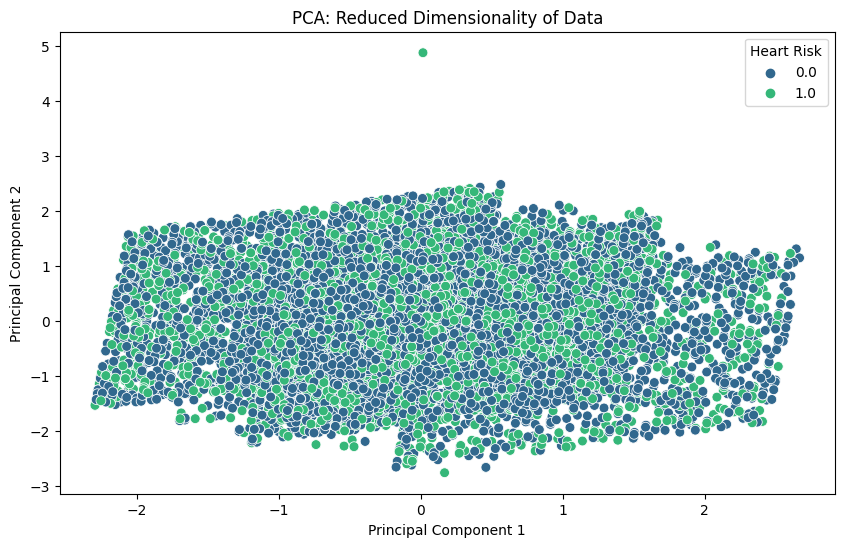

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


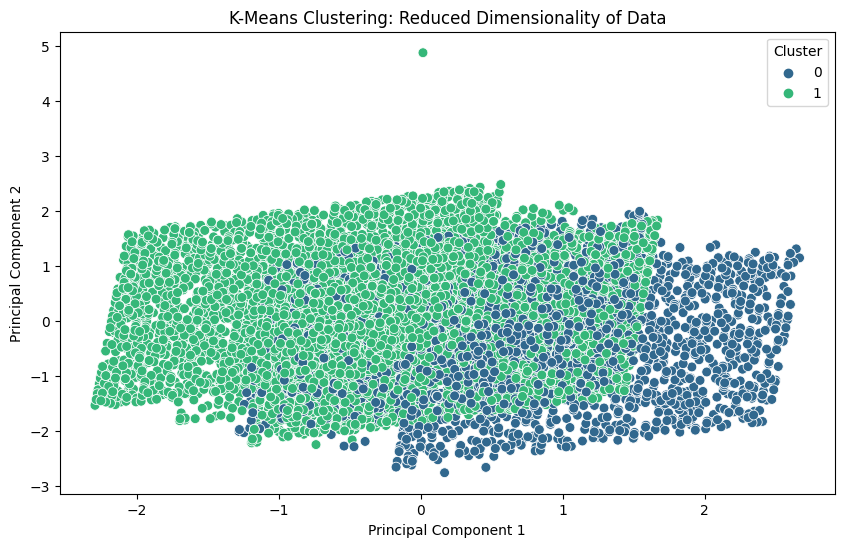

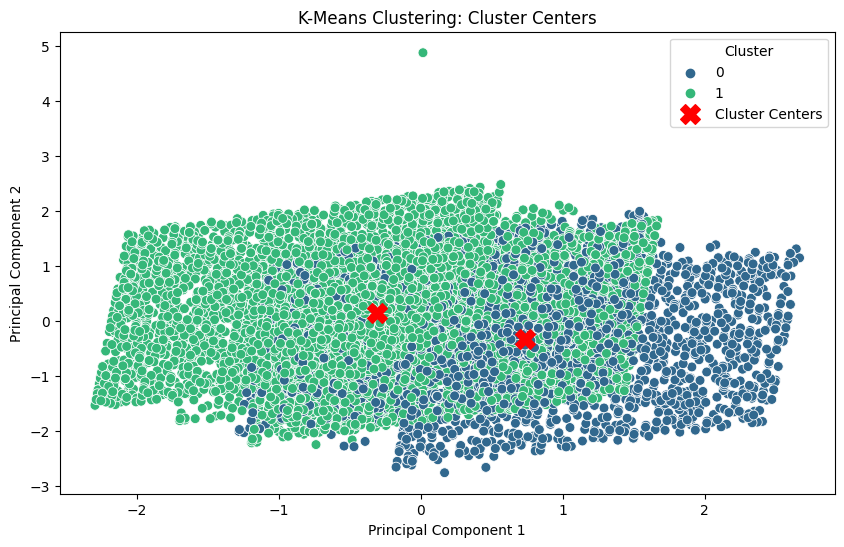

In [195]:
# Standardize the data for k-means clustering
scaler_kmeans = StandardScaler()
X_scaled_kmeans = scaler_kmeans.fit_transform(X)

# Apply PCA for dimensionality reduction
pca_kmeans = PCA(n_components=2)  # Choose the number of components
X_pca_kmeans = pca_kmeans.fit_transform(X_scaled_kmeans)

# Plot the data after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1], hue=y, palette='viridis', s=50)
plt.title('PCA: Reduced Dimensionality of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Risk')
plt.show()

# Apply k-means clustering
from sklearn.cluster import KMeans

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X_scaled_kmeans)

# Add cluster labels to the dataset
heart_attack['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1], hue=heart_attack['Cluster'], palette='viridis', s=50)
plt.title('K-Means Clustering: Reduced Dimensionality of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Visualize the cluster centers in the reduced dimension space
cluster_centers_pca = pca_kmeans.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_kmeans[:, 0], y=X_pca_kmeans[:, 1], hue=heart_attack['Cluster'], palette='viridis', s=50)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='X', color='red', s=200, label='Cluster Centers')
plt.title('K-Means Clustering: Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()